# On the size of the neighborhoods of a word
Cedric Chauve, Louxin Zhang  
October 7, 2025.

This notebook contains the code to compute various upper bounds on the size of condensed neighbourhoods of words discussed in the paper  <a href="https://arxiv.org/abs/2505.13796">On the size of the neighborhoods of a word</a>, accepted for publication in <a href="https://ieeexplore.ieee.org/xpl/RecentIssue.jsp?punumber=10723156">IEEE Transactions on Computational Biology and Bioinformatics</a>.

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# Binomial numbers
def _binom(i,j):
    if i < 0 or i < j: 
        return 1
    else: 
        return math.comb(i,j)

### Considered upper-bounds

We consider fou upper-bounds for the size of the condensed $d$-neighborhood of a word of length $n$ over an alphabet of size $s$:
 - `TCBB25_prop4`: upper-bound proved in Proposition 4 of the paper <a href="https://arxiv.org/abs/2505.13796">On the size of the neighborhoods of a word</a>.  
 - `PSC21_conj`: simple upper-bound conjectured in <a href="https://www.stringology.org/event/2021/p03.html">Refined Upper Bounds on the Size of the Condensed Neighbourhood of Sequences</a>.  
 - `Myers_rec`: bound defined by the recurrences described in <a href="https://link.springer.com/chapter/10.1007/978-1-4471-5298-9_1">What’s Behind Blast [Lemma p.10]</a>.  
 - `Myers_bound`: simpler bound inferred from the recurrences in <a href="https://link.springer.com/chapter/10.1007/978-1-4471-5298-9_1">What’s Behind Blast [Eq 1.5, p.11]</a>, that was used to analyse the average time complexity of BLAST.

In [3]:
# Upper-bound based on the edit scripts recurrences described by Gene Myers in
# What’s Behind Blast,  C. Chauve et al. (eds.), Models and Algorithms for Genome Evolution, Computational Biology 19, 2013.
# DOI: http://dx.doi.org/10.1007/978-1-4471-5298-9_1

def Myers_rec(s, n, d):
    """
    Myers recurrences for edit scripts of condensed neighborhood
    s: alphabet size
    n: length of word w
    d: maximum edit distance
    """
    def _S(s, n, d):
        if n<=d or d==0:
            return 1
        else:
            r1 = _S(s, n-1, d)
            r2 = (s-1)*_S(s, n-1, d-1)
            r3 = (s-1)*sum([math.pow(s,j)*_S(s, n-2, d-1-j) for j in range(0,d)])
            r4 = math.pow(s-1,2)*sum([math.pow(s,j)*_S(s, n-2, d-2-j) for j in range(0,d-1)])
            r5 = sum([_S(s, n-2-j, d-1-j) for j in range(0,d)])
            return (r1+r2+r3+r4+r5)
    T = _S(s, n, d) + sum([math.pow(s,j)*_S(s, n-1, d-j) for j in range(1,d+1)])
    return T

In [4]:
# Upper-bound formula described by Gene Myers in
# What’s Behind Blast,  C. Chauve et al. (eds.), Models and Algorithms for Genome Evolution, Computational Biology 19, 2013.
# DOI: http://dx.doi.org/10.1007/978-1-4471-5298-9_1

def Myers_bound(s, n, d):
    """
    Upper bound from Myers
    s: alphabet size
    n: length of word w
    d: maximum edit distance
    """
    def _B(s,n,d,c):
        return math.pow((c+1)/(c-1),n)*math.pow(c,d)*math.pow(s,d)
    eps_inv = n/d
    c_star = eps_inv + math.sqrt(1.0 + math.pow(eps_inv,2))
    sqrt2 = math.sqrt(2.0)
    return ((1.0+sqrt2)/sqrt2)*_B(s,n,d,c_star)

In [5]:
# Novel upper bound based on counting edit scripts proved by Chauve and Zhang in
# On the size of the neighborhoods of a word, arXiv:2505.13796, 2025.
# https://arxiv.org/abs/2505.13796

def TCBB25_prop4(s, n, d):
    """
    Enumeration of edit scripts
    s: alphabet size
    n: length of word w
    d: maximum edit distance
    """
    r1 = sum([
        _binom(n,i)*math.pow(s-1,d-i)*sum([
            _binom(n-i-1,j)*_binom(n+d-(2*i)-(2*j)-2,d-i-j)
            for j in range(d-i+1)
        ])
        for i in range(d+1)
    ])
    return r1

In [6]:
# Upper bound conjectured by Chauve, Mishna and Paquet-Nadeau in
# Refined upper bounds on the size of the condensed neighbourhood of sequences
# Prague Stringology Conference 2021.
# http://www.stringology.org/event/2021/p03.html
# and proved by Chauve ad Zhang in
# On the size of the neighborhoods of a word, arXiv:2505.13796, 2025.
# https://arxiv.org/abs/2505.13796

def PSC21_conj(s, n, d):
    """
    Upper bound from PSC 2021
    s: alphabet size
    n: length of word w
    d: maximum edit distance
    """
    return (math.pow(2*s-1,d)*math.pow(n,d))/math.factorial(d)

In [7]:
# Computing Table I shown in On the size of the neighborhoods of a word, arXiv:2505.13796, 2025.

def count(s, n, formula_name, fun):
    """
    For given s (alphabet size) and n (word length) and formula implemented in function fun 
    computes the formula for all values 1 <= d <= n-1 
    """
    values = []
    for d in range(1,n):
        values.append(fun(s,n,d))
    values_str = " & ".join([str(int(v)).ljust(8) for v in values])
    print(f"{formula_name.ljust(15)} n={str(n).ljust(5)}\t{values_str}")
    
distances = " & ".join([str(d).ljust(8) for d in range(1,10)])
print(f"{'distance d='.ljust(20)}\t{distances}\n")
# Novel upper bound
for n in [4,6,8,10]:
    count(2, n, "TCBB25_prop4", TCBB25_prop4)
print()
# Proved conjecture
for n in [4,6,8,10]:
    count(2, n, "PSC21_conj", PSC21_conj)
print()
# Myers recurrences
for n in [4,6,8,10]:
    count(2, n, "Myers_rec", Myers_rec)
print()
# Myers upper bound
for n in [4,6,8,10]:
    count(2, n, "Myers_bound", Myers_bound)

distance d=         	1        & 2        & 3        & 4        & 5        & 6        & 7        & 8        & 9       

TCBB25_prop4    n=4    	10       & 37       & 63      
TCBB25_prop4    n=6    	16       & 108      & 403      & 935      & 1526    
TCBB25_prop4    n=8    	22       & 215      & 1235     & 4678     & 12587    & 25943    & 44936   
TCBB25_prop4    n=10   	28       & 358      & 2775     & 14638    & 56168    & 164969   & 389994   & 784085   & 1414039 

PSC21_conj      n=4    	12       & 72       & 288     
PSC21_conj      n=6    	18       & 162      & 972      & 4374     & 15746   
PSC21_conj      n=8    	24       & 288      & 2304     & 13824    & 66355    & 265420   & 910014  
PSC21_conj      n=10   	30       & 450      & 4500     & 33750    & 202500   & 1012500  & 4339285  & 16272321 & 54241071

Myers_rec       n=4    	12       & 48       & 92      
Myers_rec       n=6    	18       & 125      & 456      & 1079     & 1990    
Myers_rec       n=8    	24       & 238     

**Comments.**  

The novel upper bound `TCBB25_prop4` proved in *"On the size of the neighborhoods of a word"* and Myers recurrences `Myers_rec` are very close, then the bound `PSC21_conj` conjectured in *"Refined upper bounds on the size of the condensed neighbourhood of sequences"*, that is an order of magnitude larger however, and finally, several order of magnitude larger, the analytic upper-bound of Myers, `Myers_bound`.

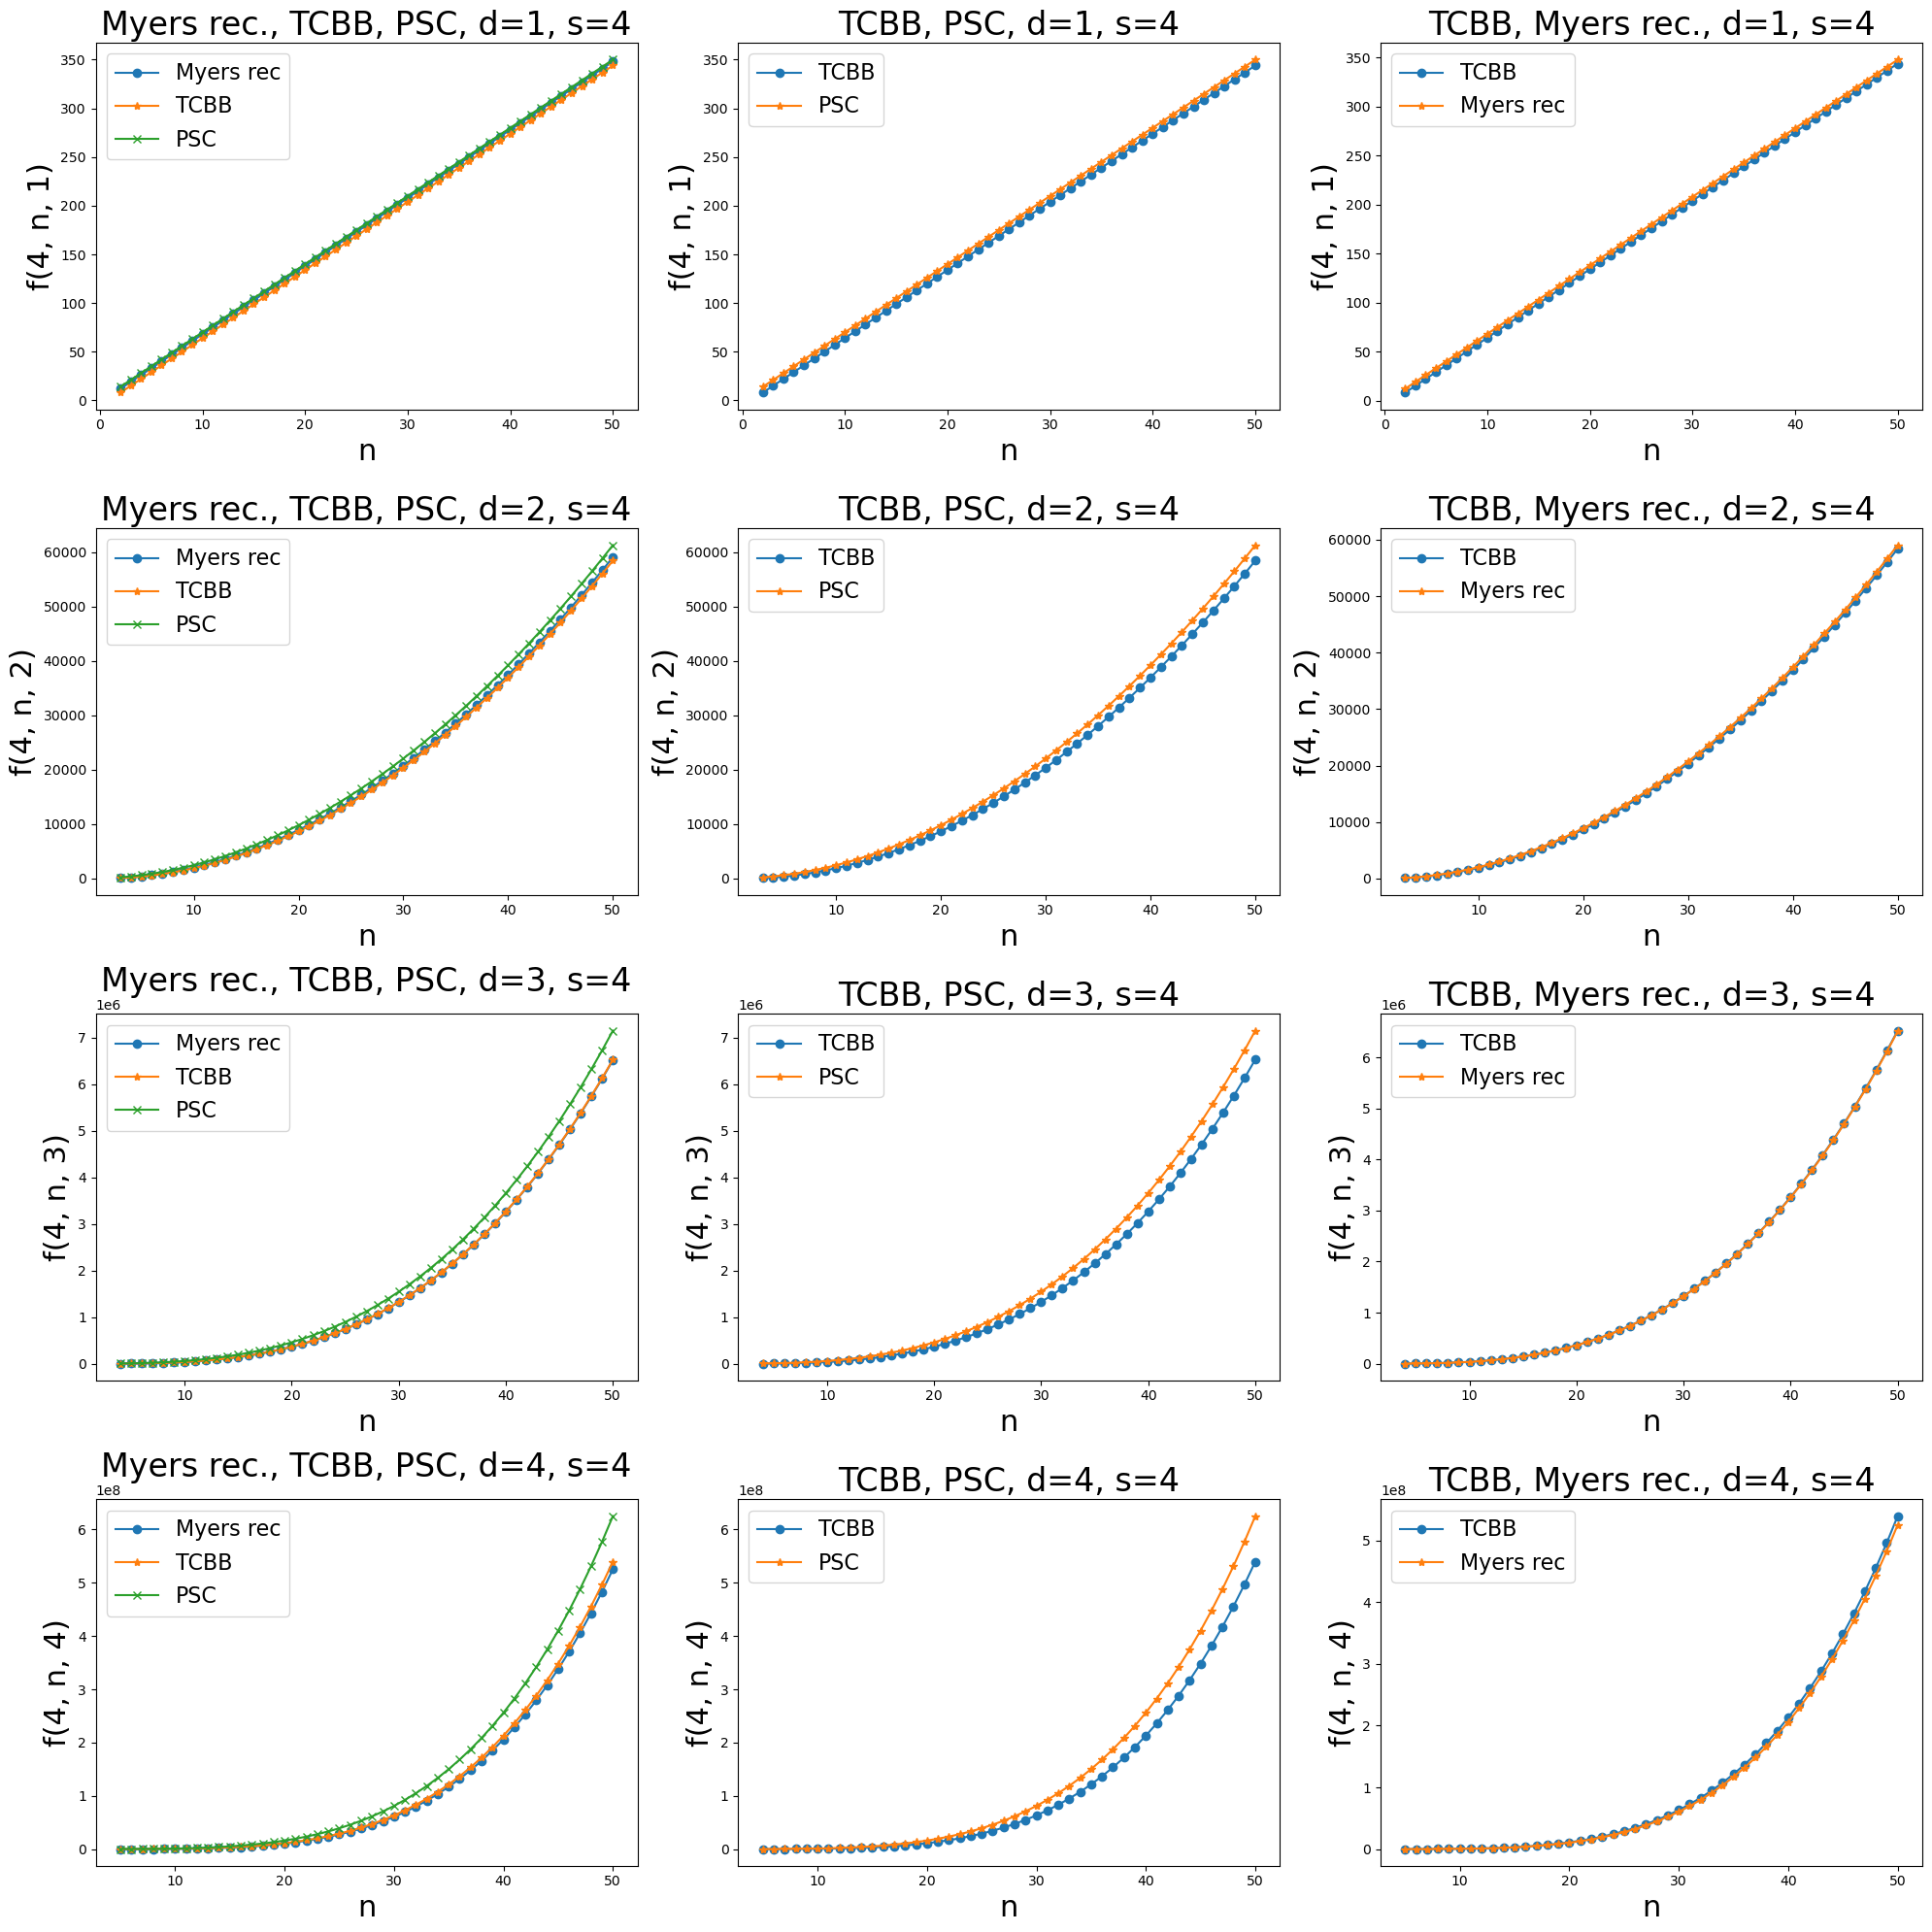

In [12]:
# Figures

s = 4  # Alphabet size, DNA alphabet
N = 50 # max value for n
D = 4  # max value for d

D_RANGE = range(1,D+1)
MYERS_REC = {d: [] for d in D_RANGE}
MYERS_BOUND = {d: [] for d in D_RANGE}
TCBB = {d: [] for d in D_RANGE}
PSC = {d: [] for d in D_RANGE}

for d in D_RANGE:
    for n in range(d+1,N+1):
        MYERS_REC[d].append(Myers_rec(s,n,d))
        MYERS_BOUND[d].append(Myers_bound(s,n,d))
        TCBB[d].append(TCBB25_prop4(s,n,d))
        PSC[d].append(PSC21_conj(s,n,d))
        
fig, axes = plt.subplots(nrows=len(D_RANGE), ncols=3, figsize=(20, 20))
for d in D_RANGE:
    N_RANGE = range(d+1,N+1)
    axes[d-1,0].plot(N_RANGE, MYERS_REC[d], 'o-', label='Myers rec')
    axes[d-1,0].plot(N_RANGE, TCBB[d], '*-', label='TCBB')
    axes[d-1,0].plot(N_RANGE, PSC[d], 'x-', label='PSC')
    axes[d-1,0].legend(fontsize=16)
    axes[d-1,0].set_title(f"Myers rec., TCBB, PSC, d={d}, s={s}", fontsize=24)
    axes[d-1,0].set_ylabel(f"f({s}, n, {d})", fontsize=22)
    axes[d-1,0].set_xlabel('n', fontsize=22)
    axes[d-1,1].plot(N_RANGE, TCBB[d], 'o-', label='TCBB')
    axes[d-1,1].plot(N_RANGE, PSC[d], '*-', label='PSC')
    axes[d-1,1].legend(fontsize=16)
    axes[d-1,1].set_title(f"TCBB, PSC, d={d}, s={s}", fontsize=24)
    axes[d-1,1].set_ylabel(f"f({s}, n, {d})", fontsize=22)
    axes[d-1,1].set_xlabel('n', fontsize=22)
    axes[d-1,2].plot(N_RANGE, TCBB[d], 'o-', label='TCBB')
    axes[d-1,2].plot(N_RANGE, MYERS_REC[d], '*-', label='Myers rec')
    axes[d-1,2].legend(fontsize=16)
    axes[d-1,2].set_title(f"TCBB, Myers rec., d={d}, s={s}", fontsize=24)
    axes[d-1,2].set_ylabel(f"f({s}, n, {d})", fontsize=22)
    axes[d-1,2].set_xlabel('n', fontsize=22)
fig.tight_layout()
plt.show()
fig.savefig("fig1.png")

### Comments
We observe similar results than in the table above. 
Both upper-bounds based on couting edit scripts (`Myers_rec.` and `TCBB25_pop4`, respectively `Myers rec.` and `TCBB` in the figures) are very close, and much better than the `PSC21_conj` (`PSC` in the figures) upper-bound.